# 대중교통 데이터 분석

## 데이터 수집
---

1. 티미니 홈페이지로 진입 https://pay.tmoney.co.kr/index.dev
2. 이용안내 클릭
3. 대중교통 통계자료 클릭
4. 월간 교통카드 통계자료 파일 다운

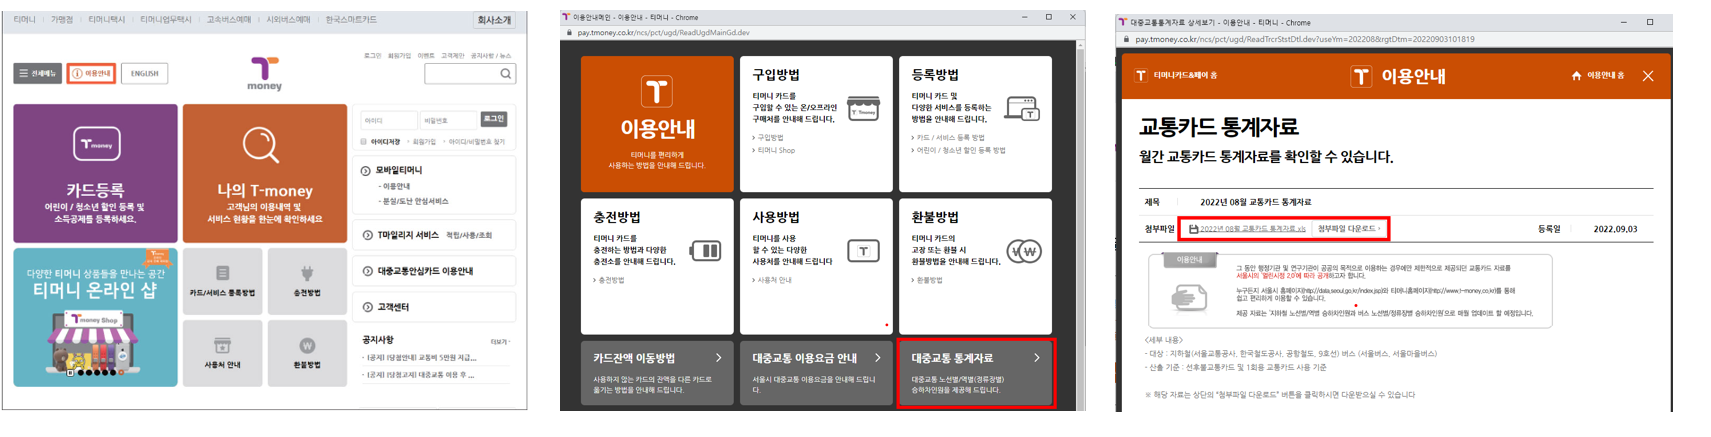

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 1. 데이터 확인
---

In [1]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터 로드
df = pd.read_csv('./data/subwayfee.csv', thousands = ',')

In [3]:
df.sample(n=5)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
68,2022-08,3호선,317,경복궁(정부서울청사),496866,518761,84347,84892,2022-09-03 10:18:23
432,2022-08,5호선,2563,미사,379969,387065,70374,70212,2022-09-03 10:18:23
165,2022-08,경인선,1807,백운,137898,131603,54098,54572,2022-09-03 10:18:23
387,2022-08,5호선,2518,화곡,637501,586784,138076,132066,2022-09-03 10:18:23
13,2022-08,2호선,204,을지로4가,274453,273859,76540,75664,2022-09-03 10:18:23


In [4]:
df.isnull().sum()

사용월     0
호선명     0
역ID     0
지하철역    0
유임승차    0
유임하차    0
무임승차    0
무임하차    0
작업일시    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


In [6]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시'], dtype='object')

## 2. 유임 승차 비율이 가장 높은 역은 어디일까?
---
__유임 승차 비율이 가장 높은 역은 어디일까?__

이 질문을 해결하기 위한 알고리즘을 잠시 생각해보자. 

```
rate = 유임승차인원 / 무임승차인원
```

1. 데이터를 읽어온다.
2. 모든 역의 데이터를 바탕으로 각 역의 비율(rate)를 계산한다.
3. 비율이 가장 높은 역을 찿는다.
4. 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다.


In [7]:
df.sample()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
377,2022-08,경강선,1509,부발,54770,53452,8503,8492,2022-09-03 10:18:23


### EDA

In [8]:
# 전반적인 정보,컬럼수, 행수,타입, 결측치 여부 파악 용도
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


In [9]:
#통계적 정보
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,617.000000,6.170000e+02,6.170000e+02,617.000000,617.000000
mean,1928.145867,2.498817e+05,2.492992e+05,52280.401945,51740.601297
std,1205.032659,2.592505e+05,2.641137e+05,43689.330709,43510.255133
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1204.000000,8.235000e+04,7.733000e+04,21643.000000,21059.000000
50%,1846.000000,1.782060e+05,1.727850e+05,41384.000000,40539.000000
75%,2637.000000,3.294550e+05,3.360250e+05,67543.000000,66687.000000
max,4713.000000,2.073808e+06,2.018576e+06,277589.000000,282283.000000


In [10]:
# 데이터 중복여부
df['지하철역'].value_counts()

서울역               5
공덕                4
동대문역사문화공원(DDP)    3
고속터미널             3
홍대입구              3
                 ..
정왕                1
신길온천              1
안산                1
초지                1
관악산(서울대)          1
Name: 지하철역, Length: 526, dtype: int64

In [11]:
#서울역이 왜 여러개지?
#데이터를 봐야겠다
df[df['지하철역'] == '서울역'] #중복 데이터가 아님

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23
111,2022-08,4호선,426,서울역,270602,479888,35704,44605,2022-09-03 10:18:23
120,2022-08,경부선,1001,서울역,246839,70773,13293,2816,2022-09-03 10:18:23
326,2022-08,경의선,1291,서울역,98709,123369,14353,17548,2022-09-03 10:18:23
566,2022-08,공항철도 1호선,4201,서울역,261344,244162,31322,27197,2022-09-03 10:18:23


In [12]:
#지하철역 개수
# df['지하철역'].unique()
df['지하철역'].unique().size #넘파이 타입에 사용하는것

526

In [13]:
#데이터 카테고리 수
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시'], dtype='object')

In [14]:
#호선명 개수
len(df['호선명'].unique()) # 파이썬 내장함수

26

## 유임승차 비율 구하기

In [15]:
df['유임승차'] / (df['유임승차'] + df['무임승차'])

0      0.866033
1      0.858382
2      0.865174
3      0.608373
4      0.613497
         ...   
612    0.732929
613    0.698681
614    0.759355
615    0.733135
616    0.561216
Length: 617, dtype: float64

In [ ]:
#타입변경
# 앞에서 이미 쉼표지워서 int로바꿈

In [ ]:
#특수문자 제거


In [16]:
#유임승차비율 컬럼 새로 만들기
df['유임승차비율'] = df['유임승차'] / (df['유임승차'] + df['무임승차'])

In [17]:
#유임승차 비율이 높은순대로 정렬
df.sort_values(by='유임승차비율',ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
237,2022-08,분당선,1031,복정,13,0,0,0,2022-09-03 10:18:23,1.000000
192,2022-08,경원선,1022,창동,10,0,0,0,2022-09-03 10:18:23,1.000000
521,2022-08,7호선,2760,굴포천,2,0,0,0,2022-09-03 10:18:23,1.000000
522,2022-08,7호선,2761,부평구청,3,0,0,0,2022-09-03 10:18:23,1.000000
519,2022-08,7호선,2758,상동,2,0,0,0,2022-09-03 10:18:23,1.000000
...,...,...,...,...,...,...,...,...,...,...
295,2022-08,중앙선,1219,용문,33480,33582,37976,37890,2022-09-03 10:18:23,0.468540
9,2022-08,1호선,159,동묘앞,116233,122982,133024,134234,2022-09-03 10:18:23,0.466318
296,2022-08,중앙선,1220,지평,943,1034,1130,1107,2022-09-03 10:18:23,0.454896
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23,0.452854


> * 무임승차가 0인 겨우 유임승차비율이 1로 나타납니다. 
> * 무임승차가 0이 아닌 경우로 한정해서 다시 정렬해야할 것 같습니다. 

In [18]:
df_no0 = df['유임승차'] / (df['유임승차'] + (df['무임승차'] > 0))

In [19]:
df_no0.head()

0    0.999999
1    0.999998
2    0.999999
3    0.999998
4    0.999997
dtype: float64

In [20]:
df.sort_values(by='유임승차비율',ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
237,2022-08,분당선,1031,복정,13,0,0,0,2022-09-03 10:18:23,1.000000
192,2022-08,경원선,1022,창동,10,0,0,0,2022-09-03 10:18:23,1.000000
521,2022-08,7호선,2760,굴포천,2,0,0,0,2022-09-03 10:18:23,1.000000
522,2022-08,7호선,2761,부평구청,3,0,0,0,2022-09-03 10:18:23,1.000000
519,2022-08,7호선,2758,상동,2,0,0,0,2022-09-03 10:18:23,1.000000
...,...,...,...,...,...,...,...,...,...,...
295,2022-08,중앙선,1219,용문,33480,33582,37976,37890,2022-09-03 10:18:23,0.468540
9,2022-08,1호선,159,동묘앞,116233,122982,133024,134234,2022-09-03 10:18:23,0.466318
296,2022-08,중앙선,1220,지평,943,1034,1130,1107,2022-09-03 10:18:23,0.454896
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23,0.452854


> * 유동인구 자체가 적은 역이 유임승차비율이 높은것으로 나타납니다. 
> * 유동인구가 많은 역을 대상으로 분석해야 할 것 같습니다. 

In [21]:
#유임승차와 무임승차를 모두 합해서 10만명을 초과하는 역만 대상

df_10 = df[(df['유임승차']+ df['무임승차']) > 100000]

In [22]:
# 필터 완료한 데이터프레임 카피
df_10.sort_values(by='유임승차비율', ascending=False).head(10)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
568,2022-08,공항철도 1호선,4203,홍대입구,334381,344582,17164,16166,2022-09-03 10:18:23,0.951176
48,2022-08,2호선,239,홍대입구,1717050,1851268,90063,86905,2022-09-03 10:18:23,0.950162
120,2022-08,경부선,1001,서울역,246839,70773,13293,2816,2022-09-03 10:18:23,0.948899
570,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283,206531,12852,12660,2022-09-03 10:18:23,0.943911
565,2022-08,9호선,4125,신논현,790971,787147,48569,46859,2022-09-03 10:18:23,0.942148
555,2022-08,9호선,4115,여의도,721152,680330,46281,42069,2022-09-03 10:18:23,0.939694
457,2022-08,6호선,2632,한강진,224575,266059,14949,14544,2022-09-03 10:18:23,0.937589
571,2022-08,공항철도 1호선,4207,김포공항,337165,182448,22741,14639,2022-09-03 10:18:23,0.936814
18,2022-08,2호선,209,한양대,177378,188876,11994,12537,2022-09-03 10:18:23,0.936664
31,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,0.934026


> * 한양대, 홍대입구 같은 대학 근처 역과 
> * 서울이나 논현,강남과 같은 사람들이 많이 다니는 곳의 유임승차 비율이 높은 것 같습니다. 

In [25]:
line = df_10.loc[568,'호선명']
subname = df_10.loc[568,'지하철역']
rate = df_10.loc[568,'유임승차비율']

# print('유임 승차 비율이 가장 높은 역은? {} {} {:.2f}%'
# .format(subname,line,rate*100))
print(f'유임 승차 비율이 가장 높은 역은? {subname} {line} {rate*100:0.2f}%')


유임 승차 비율이 가장 높은 역은? 홍대입구 공항철도 1호선 95.12%


---

## 3. 유무임 승하차 인원이 가장 많은 역은 어디일까?
---
__유무임 승하차 인원이 가장 많은 역은 어디일까?__

유임 승차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾으면 되니까 다음과 같은 간단한 알고리즘을 생각할 수 있다.

1. 데이터를 읽어온다
2. 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
3. 각각의 인원이 가장 많은 역을 출력한다.

In [29]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/subwayfee.csv', thousands = ',')

#데이터 전처리
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23


In [40]:
#유임승차가 가장 많은 역
df.sort_values(by='유임승차',ascending=False).head(1)
#유임하차가 가장 많은 역
df.sort_values(by='유임하차',ascending=False).head(1)
#무임승차가 가장 많은 역
df.sort_values(by='무임승차',ascending=False).head(1)
#무임하차가 가장 많은 역
df.sort_values(by='무임하차',ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23


In [32]:
line1 = df_10.loc[31,'호선명']
subname1 = df_10.loc[31,'지하철역']
rate1 = df_10.loc[31,'유임승차']
print(f'유임승차 : {line1} {subname1} {rate1}')

유임승차 : 2호선 강남 2073808


In [33]:
line2 = df_10.loc[31,'호선명']
subname2 = df_10.loc[31,'지하철역']
rate2 = df_10.loc[31,'유임하차']
print(f'유임승차 : {line2} {subname2} {rate2}')

유임승차 : 2호선 강남 2018576


In [42]:
line3 = df_10.loc[3,'호선명']
subname3 = df_10.loc[3,'지하철역']
rate3 = df_10.loc[3,'무임승차']
print(f'유임승차 : {line3} {subname3} {rate3}')

유임승차 : 1호선 종로3가 277589


In [41]:
line4 = df_10.loc[7,'호선명']
subname4 = df_10.loc[7,'지하철역']
rate4 = df_10.loc[7,'무임하차']
print(f'유임승차 : {line4} {subname4} {rate4}')

유임승차 : 1호선 제기동 282283


In [49]:
#유임승차가 가장 많은 역
pay_in = df.sort_values(by='유임승차',ascending=False).iloc[0,[1,3,4]]
#유임하차가 가장 많은 역
pay_out = df.sort_values(by='유임하차',ascending=False).iloc[0,[1,3,5]]
#무임승차가 가장 많은 역
nopay_in = df.sort_values(by='무임승차',ascending=False).iloc[0,[1,3,6]]
#무임하차가 가장 많은 역
nopay_out = df.sort_values(by='무임하차',ascending=False).iloc[0,[1,3,7]]

In [50]:
print(f'유임승차 : {pay_in[0]} {pay_in[1]} {pay_in[2]}')
print(f'유임하차 : {pay_out[0]} {pay_out[1]} {pay_out[2]}')
print(f'무임승차 : {nopay_in[0]} {nopay_in[1]} {nopay_in[2]}')
print(f'무임하차 : {nopay_out[0]} {nopay_out[1]} {nopay_out[2]}')

유임승차 : 2호선 강남 2073808
유임하차 : 2호선 강남 2018576
무임승차 : 1호선 종로3가 277589
무임하차 : 1호선 제기동 282283


In [73]:
df.sort_values(by='무임승차',ascending=False).iloc[4,[1,3,6]]

호선명        경부선
지하철역       영등포
무임승차    241269
Name: 125, dtype: object

```
아래와 같이 분석 결과를 출력해 봅시다

유임승차 : 2호선 강남 2073808
유임하차 : 2호선 강남 2018576
무임승차 : 1호선 종로3가 277589
무임하차 : 1호선 제기동 282283

```

In [ ]:
df['유임승하차'] = df['유임승차']+df['유임하차']
df.sort_values(by='유임승하차',ascending=False)

## 모든 역의 유무임 승하차 비율은 어떻게 될까
---
이번에는 데이터가 있는 모든 역에 대한 유무임 승하차 비율을 표현해보자.

In [81]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/subwayfee.csv', thousands = ',')

#데이터 전처리
df.head()



,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23


In [ ]:
for i,row in enumerate(df.values):
    plt.pie(row[4:8])
    plt.show()
    if i == 3: break

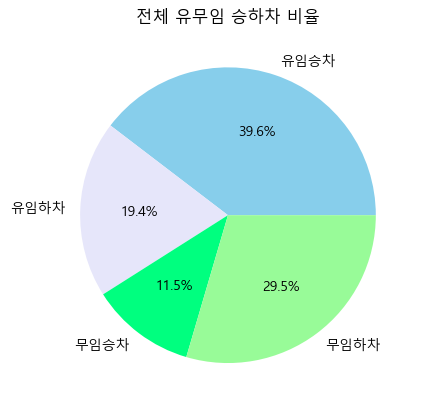

In [94]:
# 파이차트 그리기
pay1 = df['유임승차'][4]
pay2 = df['유임하차'][5]
pay3 = df['무임승차'][6]
pay4 = df['무임하차'][7]

plt.title('전체 유무임 승하차 비율')
plt.pie([pay1,pay2,pay3,pay4] 
,labels=['유임승차','유임하차','무임승차','무임하차']
,autopct='%.1f%%',colors = ['skyblue','lavender','springgreen','palegreen'])
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False


```
**코드는 어떻게 보완하면 좋을까?**

1. 어떤 역에 대한 차트인지 정보가 부족하다.
2. 비율을 수치로 정확하게 나타내면 좋겠다.
3. 색상을 좀 더 예쁘게 바꾸고 싶을 수 있다.
```

In [ ]:
# plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
# #plt.rc('font', family='AppleGothic')     #맥
# plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

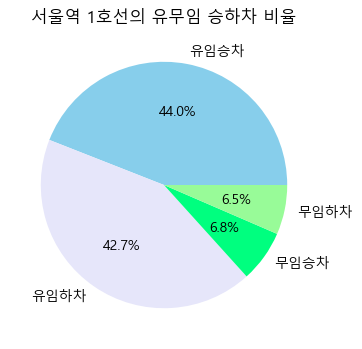

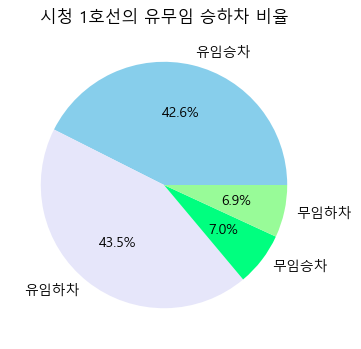

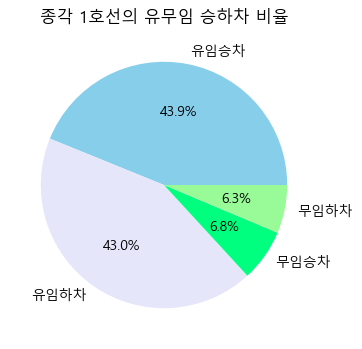

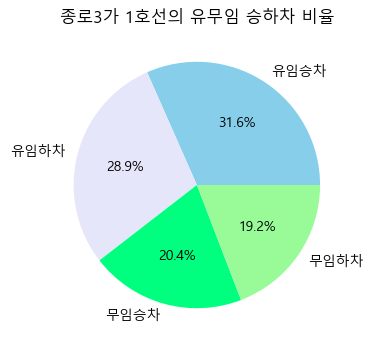

In [118]:
# 각 역마다 유무임 승하차 비율 시각화
for i,row in enumerate(df.values):
    plt.figure(figsize=(4,4))
    plt.title(f'{row[3]} {row[1]}의 유무임 승하차 비율')
    plt.pie(row[4:8], labels = ['유임승차','유임하차','무임승차','무임하차']
    ,autopct='%.1f%%'
    ,colors = ['skyblue','lavender','springgreen','palegreen'])
    plt.savefig(f'./data/image/{row[3]}{row[1]}.png')
    plt.show()
    if i == 3: break

```
마지막으로 시각화한 자료를 이미지 파일로 저장하자. 
그래프를 이미지로 저장하려면 `savefig()` 함수를 사용하면 된다.
```

<Figure size 640x480 with 0 Axes>

## 4. 그래프를 여러개 그리기